---
# <font color="#CA3532">IPCV Part III miniproject</font>
---

Last updated on 2022-04-21


---

*SESSION 1: *

- This assingment uses [Keras](https://keras.io/)

- Keras is an open-source neural-network library. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible.

- Keras itself can work using different motors. We will use it with TensorFlow under the hood.

- We will analyze the vanishing gradient problem and initialization methods together with other optimization methods.


In [1]:
# TO-DO: Include your names and NIAs here:
student_data = [{'name': 'Subham Shome', 'nia': 'e493357'},
                {'name': 'Hyeon Yu', 'nia': 'e493361'}]
print("Student Data:")
print()
for student in student_data:
    print(f"Name: {student['name']}")
    print(f"NIA: {student['nia']}")
    print()

Student Data:

Name: Subham Shome
NIA: e493357

Name: Hyeon Yu
NIA: e493361



### <font color="#CA3532">Import the libraries</font>

TensorFlow officially included Keras, so if you have TensorFlow, you have keras!

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import keras as k
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from time import time

!git clone https://github.com/luisferuam/DLFBT-LAB
import sys
sys.path.append('DLFBT-LAB')
import dlfbt

Cloning into 'DLFBT-LAB'...
remote: Enumerating objects: 128, done.
remote: Total 128 (delta 0), reused 0 (delta 0), pack-reused 128
Receiving objects: 100% (128/128), 6.41 MiB | 7.46 MiB/s, done.
Resolving deltas: 100% (65/65), done.


### <font color="#CA3532">Data set</font>


In [3]:
dataset_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/phoneme.csv'
# Details https://raw.githubusercontent.com/jbrownlee/Datasets/master/phoneme.names

dataset = np.loadtxt(dataset_url, delimiter=',')

# Split database in atributtes and classes
print(dataset)

#-------------------------------------------------------------------------------
# TO-DO block: Divide attributes and classes/labels. Store the numer of atrributes
#-------------------------------------------------------------------------------
x = dataset[:, 0:5]
y = dataset[:, -1]

x_size = x.shape[1]

# print(x.shape)
# print(y.shape)
# print(x_size)
#-------------------------------------------------------------------------------
# End of TO-DO block 
#-------------------------------------------------------------------------------

[[ 1.24   0.875 -0.205 -0.078  0.067  0.   ]
 [ 0.268  1.352  1.035 -0.332  0.217  0.   ]
 [ 1.567  0.867  1.3    1.041  0.559  0.   ]
 ...
 [ 1.031  0.584  1.866  1.532 -0.671  1.   ]
 [ 0.15   0.933  2.363 -0.742 -0.617  0.   ]
 [ 0.137  0.714  1.35   0.972 -0.63   1.   ]]


In [4]:
# Final result with the classes stored in y
print(x_size)
print(x)
print(y)

5
[[ 1.24   0.875 -0.205 -0.078  0.067]
 [ 0.268  1.352  1.035 -0.332  0.217]
 [ 1.567  0.867  1.3    1.041  0.559]
 ...
 [ 1.031  0.584  1.866  1.532 -0.671]
 [ 0.15   0.933  2.363 -0.742 -0.617]
 [ 0.137  0.714  1.35   0.972 -0.63 ]]
[0. 0. 0. ... 1. 0. 1.]


In [5]:
# Normalize the data
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

### <font color="#CA3532">Defining our model</font>

- From the input to the output in keras we can define the properties of each laye (size, activation function, connectivity topology...) with the sequential mode.

- In this case we are going to create our basic multilayer feedforward network



In [6]:
# Define the model using keras
nn = Sequential()

#-------------------------------------------------------------------------------
# TO-DO block: Add fully connected layers to create a MLP
#-------------------------------------------------------------------------------

nn = Sequential()

act_fn = "relu"

nn.add(tf.keras.Input(shape=(x_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn))
nn.add(tf.keras.layers.Dense(128, activation=act_fn))
nn.add(tf.keras.layers.Dense(64, activation=act_fn))
nn.add(tf.keras.layers.Dense(32, activation=act_fn))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))
#-------------------------------------------------------------------------------
# End of TO-DO block 
#-------------------------------------------------------------------------------

### <font color="#CA3532">Compile the network</font>

- Compile is the step where our network is created

- Here we have to define different aspects involved in the trainning of the network

- In each section you have an URL to the official documentation. Take a look at the availability of different strategies in each case.

- It is possible to also define your own functions for this.

### <font color="#CA3532"> Optimizer </font>

Strategy to calculate the weights corrections

https://keras.io/api/optimizers/


### <font color="#CA3532"> Loss function </font>

The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.

https://keras.io/api/losses/

### <font color="#CA3532"> Metrics (results) </font>

A metric is a function that is used to judge the performance of your model.

Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model. Note that you may use any loss function as a metric.

https://keras.io/api/metrics/


### <font color="#CA3532"> Initialization </font>

Initializers define the way to set the initial weights weights of your network layers.

https://keras.io/api/layers/initializers/



In [7]:
# Compile

#-------------------------------------------------------------------------------
# TO-DO block: Compile your network
#-------------------------------------------------------------------------------
nn.compile(optimizer="Adam", loss="mse", metrics=["accuracy"])
#-------------------------------------------------------------------------------
# End of TO-DO block 
#-------------------------------------------------------------------------------

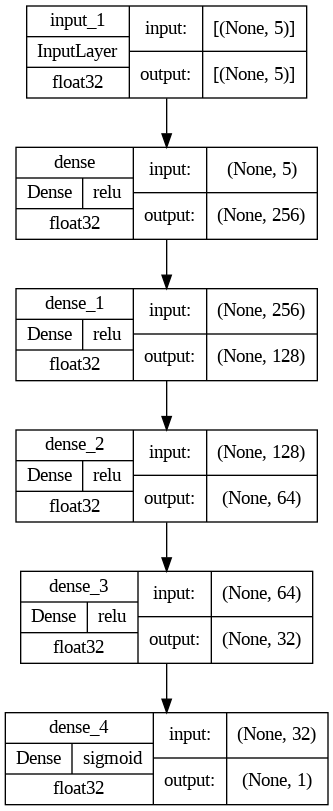

In [8]:
tf.keras.utils.plot_model(
    nn, 
    show_layer_activations=True, 
    show_shapes=True,
    show_dtype=True)

### <font color="#CA3532">Train the network</font>

The Fit method trains the network according to the data.

Here we introduce all the data together and select a 20% of the data for validation purposes.

Other ways to do this are allowed, including the optimization of the parameters.

https://keras.io/api/models/model_training_apis/#fit-method

In [9]:
# Fit
history = nn.fit(x, y, epochs=400, verbose=1, validation_split=0.2)

# Fit
# history = nn.fit(x, y, epochs=500, verbose=0, validation_split=0.2)

Epoch 1/400
136/136 [==============================] - 8s 5ms/step - loss: 0.1433 - accuracy: 0.7860 - val_loss: 0.1213 - val_accuracy: 0.8205
Epoch 2/400
136/136 [==============================] - 1s 4ms/step - loss: 0.1186 - accuracy: 0.8251 - val_loss: 0.1121 - val_accuracy: 0.8279
Epoch 3/400
136/136 [==============================] - 1s 4ms/step - loss: 0.1113 - accuracy: 0.8372 - val_loss: 0.1078 - val_accuracy: 0.8242
Epoch 4/400
136/136 [==============================] - 1s 5ms/step - loss: 0.1081 - accuracy: 0.8432 - val_loss: 0.1046 - val_accuracy: 0.8418
Epoch 5/400
136/136 [==============================] - 1s 4ms/step - loss: 0.1031 - accuracy: 0.8547 - val_loss: 0.1072 - val_accuracy: 0.8390
Epoch 6/400
136/136 [==============================] - 1s 4ms/step - loss: 0.1014 - accuracy: 0.8517 - val_loss: 0.1061 - val_accuracy: 0.8529
Epoch 7/400
136/136 [==============================] - 1s 4ms/step - loss: 0.0982 - accuracy: 0.8614 - val_loss: 0.1117 - val_accuracy: 0.8233

In [10]:
# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just considering 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

# Also, the predict method is available to classify unlabeled data

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________



169/169 [==============================] - 0s 2

### <font color="#CA3532">Plot data</font>

- History object saves the different epoch data

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


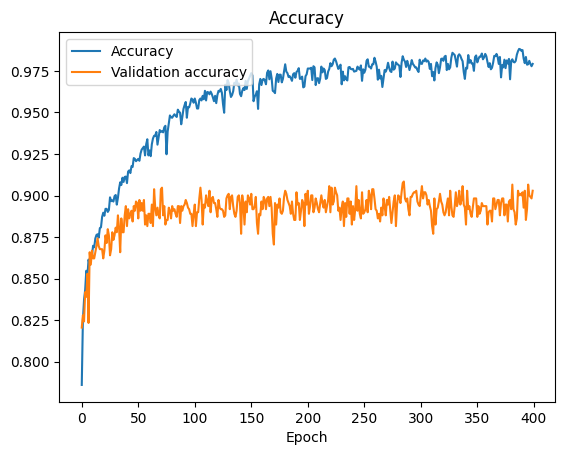

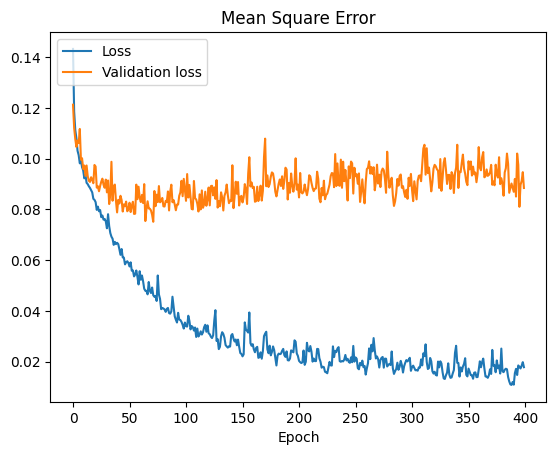

In [11]:
# Plot history

print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

Epoch 1/40
136/136 [==============================] - 2s 5ms/step - loss: 0.2063 - accuracy: 0.7213 - val_loss: 0.1748 - val_accuracy: 0.7687
Epoch 2/40
136/136 [==============================] - 1s 4ms/step - loss: 0.1665 - accuracy: 0.7509 - val_loss: 0.1556 - val_accuracy: 0.7724
Epoch 3/40
136/136 [==============================] - 1s 4ms/step - loss: 0.1568 - accuracy: 0.7569 - val_loss: 0.1501 - val_accuracy: 0.7687
Epoch 4/40
136/136 [==============================] - 1s 4ms/step - loss: 0.1527 - accuracy: 0.7583 - val_loss: 0.1470 - val_accuracy: 0.7743
Epoch 5/40
136/136 [==============================] - 1s 4ms/step - loss: 0.1501 - accuracy: 0.7694 - val_loss: 0.1455 - val_accuracy: 0.7687
Epoch 6/40
136/136 [==============================] - 1s 4ms/step - loss: 0.1487 - accuracy: 0.7747 - val_loss: 0.1438 - val_accuracy: 0.7863
Epoch 7/40
136/136 [==============================] - 1s 4ms/step - loss: 0.1475 - accuracy: 0.7782 - val_loss: 0.1430 - val_accuracy: 0.7891
Epoch 

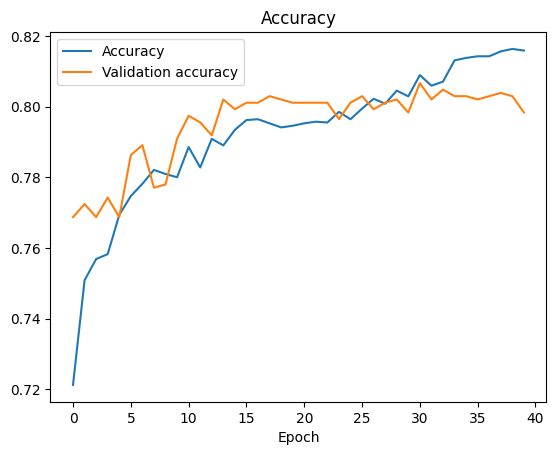

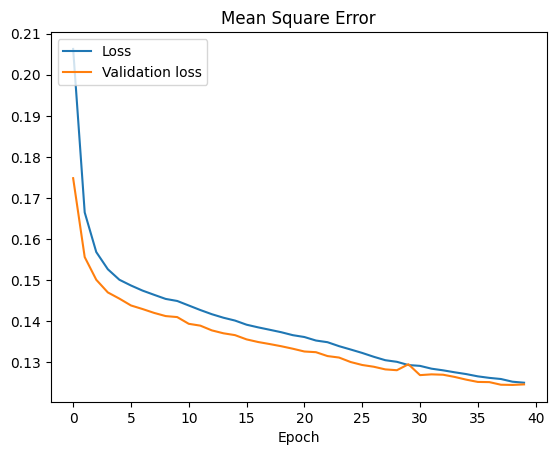

In [12]:
nn = Sequential()

act_fn = "relu"

nn.add(tf.keras.Input(shape=(x_size,)))
nn.add(tf.keras.layers.Dense(5, activation=act_fn))
nn.add(tf.keras.layers.Dense(8, activation=act_fn))
nn.add(tf.keras.layers.Dense(4, activation=act_fn))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

nn.compile(optimizer="Adam", loss="mse", metrics=["accuracy"])

history = nn.fit(x, y, epochs=40, verbose=1, validation_split=0.2)

nn.summary()
print('\n\n')

loss, accuracy = nn.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()


In [13]:
#-------------------------------------------------------------------------------
# TO-DO block: Explain what you observe
#-------------------------------------------------------------------------------
# Using a small number of neurons in the hidden layer (~= input layer)
print("After undergoing 40 epochs of training, our small model (5-8-4-1) accomplished an 83.22% test accuracy. \n\
Notably, the mean squared error (MSE) loss exhibits a steady decline throughout the training process, while the accuracy progressively improves. \n\
By analyzing the losses, it becomes evident that the validation loss also converges toward the same low value as the training loss.")
# Using a big number of neurons in the hidden layer (>> input layer)
print('\n')
print("Upon executing our larger model (256-128-64-32-1) for 400 epochs, it obtained a test accuracy of 95.58%. \n\
However, we observed that the validation loss ceases to decrease after 75 epochs, indicating that our model is prone to overfitting.")
#-------------------------------------------------------------------------------
# End of TO-DO block 
#-------------------------------------------------------------------------------

After undergoing 40 epochs of training, our small model (5-8-4-1) accomplished an 83.22% test accuracy. 
Notably, the mean squared error (MSE) loss exhibits a steady decline throughout the training process, while the accuracy progressively improves. 
By analyzing the losses, it becomes evident that the validation loss also converges toward the same low value as the training loss.


Upon executing our larger model (256-128-64-32-1) for 400 epochs, it obtained a test accuracy of 95.58%. 
However, we observed that the validation loss ceases to decrease after 75 epochs, indicating that our model is prone to overfitting.


### <font color="#CA3532">Optimize the network design</font>

- Change the network arquitecture, introducing more layers and neurons to obtain a better result. You can:
 - Add more and different type of layers
 - Change the activation funcions
 - Change the loss / optimizer
 - Change your initialization




Epoch 1/10000
136/136 [==============================] - 2s 5ms/step - loss: 0.5287 - accuracy: 0.7280 - val_loss: 0.4671 - val_accuracy: 0.7604
Epoch 2/10000
136/136 [==============================] - 1s 6ms/step - loss: 0.4735 - accuracy: 0.7576 - val_loss: 0.4625 - val_accuracy: 0.7502
Epoch 3/10000
136/136 [==============================] - 1s 6ms/step - loss: 0.4711 - accuracy: 0.7495 - val_loss: 0.4601 - val_accuracy: 0.7641
Epoch 4/10000
136/136 [==============================] - 1s 5ms/step - loss: 0.4700 - accuracy: 0.7550 - val_loss: 0.4590 - val_accuracy: 0.7521
Epoch 5/10000
136/136 [==============================] - 1s 4ms/step - loss: 0.4683 - accuracy: 0.7548 - val_loss: 0.4574 - val_accuracy: 0.7613
Epoch 6/10000
136/136 [==============================] - 1s 4ms/step - loss: 0.4669 - accuracy: 0.7576 - val_loss: 0.4560 - val_accuracy: 0.7567
Epoch 7/10000
136/136 [==============================] - 1s 4ms/step - loss: 0.4655 - accuracy: 0.7571 - val_loss: 0.4544 - val_ac

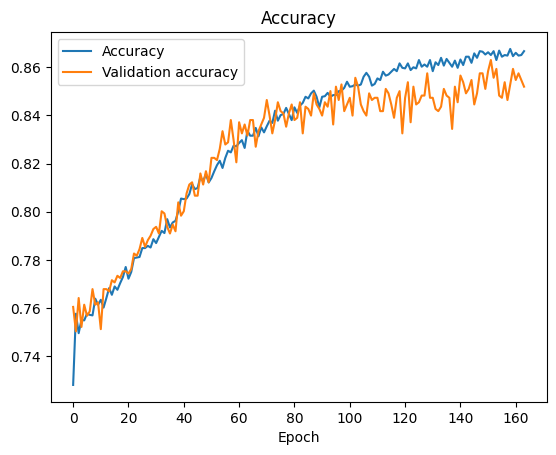

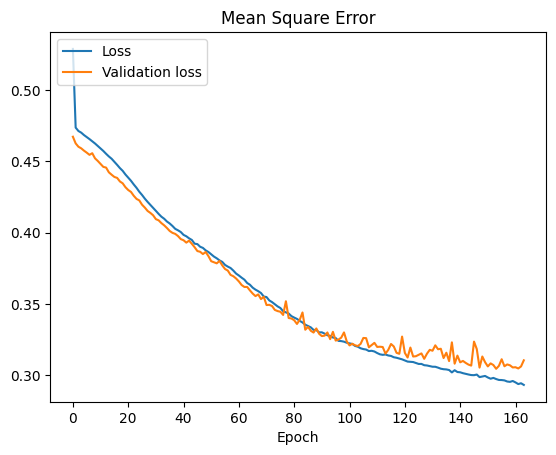

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               1536      
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 20,097
Trainable params: 20,097
Non-trainable params: 0
_________________________________________________________________



169/169 [==============================] - 0s 2ms/step - loss: 0.2959 - accuracy: 0.8638
Accuracy: 86.38


In [14]:
# Define the model using keras
nn = Sequential()

#-------------------------------------------------------------------------------
# TO-DO block: Include your code below
#-------------------------------------------------------------------------------
act_fn = "tanh"

nn.add(tf.keras.Input(shape=(x_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn))
nn.add(tf.keras.layers.Dense(64, activation=act_fn))
nn.add(tf.keras.layers.Dense(32, activation=act_fn))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))


early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

nn.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])
#-------------------------------------------------------------------------------
# End of TO-DO block 
#-------------------------------------------------------------------------------

# Fit
history = nn.fit(x, y, epochs=10000, validation_split=0.2, callbacks=[early_stop])

# Plot history

print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

# <font color="#CA3532">SESSION 2</font>


### <font color="#CA3532">Dataset input</font>


In [15]:
# Load here your selected dataset considering input and output dimensions
dataset_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/phoneme.csv'
dataset = np.loadtxt(dataset_url, delimiter=',')

x = dataset[:, 0:5]
y = dataset[:, -1]

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

input_size = x.shape[1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

print("Label 1:", np.mean(y))
print("train:", np.mean(y_train))
print("test:", np.mean(y_test))

(4323, 5)
(4323,)
(1081, 5)
(1081,)
Label 1: 0.2934863064396743
train: 0.29354614850798055
test: 0.29324699352451433


### <font color="#CA3532">Standar choice</font>

- Evaluate the training with a standard choice of cost and activation functions, learning rate, weight initialization and network topology.
- Generate the loss and accuracy figures

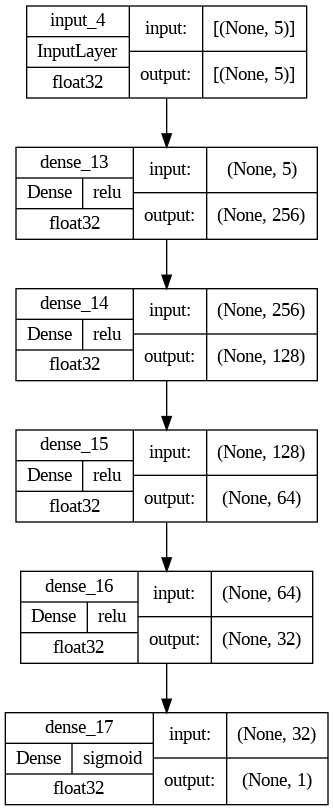

In [16]:
# Code

nn = Sequential()

act_fn = "relu"

nn.add(tf.keras.Input(shape=(input_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn))
nn.add(tf.keras.layers.Dense(128, activation=act_fn))
nn.add(tf.keras.layers.Dense(64, activation=act_fn))
nn.add(tf.keras.layers.Dense(32, activation=act_fn))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

tf.keras.utils.plot_model(
    nn, 
    show_layer_activations=True, 
    show_shapes=True,
    show_dtype=True)

In [17]:
nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["accuracy"])

# Fit
history = nn.fit(x_train, y_train, epochs=200, validation_split=0.1)

Epoch 1/200
122/122 [==============================] - 3s 7ms/step - loss: 0.1456 - accuracy: 0.7817 - val_loss: 0.1235 - val_accuracy: 0.8014
Epoch 2/200
122/122 [==============================] - 1s 5ms/step - loss: 0.1191 - accuracy: 0.8180 - val_loss: 0.1096 - val_accuracy: 0.8176
Epoch 3/200
122/122 [==============================] - 1s 5ms/step - loss: 0.1110 - accuracy: 0.8347 - val_loss: 0.1099 - val_accuracy: 0.8268
Epoch 4/200
122/122 [==============================] - 1s 4ms/step - loss: 0.1045 - accuracy: 0.8468 - val_loss: 0.1099 - val_accuracy: 0.8245
Epoch 5/200
122/122 [==============================] - 0s 4ms/step - loss: 0.1020 - accuracy: 0.8524 - val_loss: 0.1017 - val_accuracy: 0.8453
Epoch 6/200
122/122 [==============================] - 0s 4ms/step - loss: 0.0993 - accuracy: 0.8599 - val_loss: 0.0994 - val_accuracy: 0.8453
Epoch 7/200
122/122 [==============================] - 0s 4ms/step - loss: 0.0987 - accuracy: 0.8571 - val_loss: 0.1059 - val_accuracy: 0.8314

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


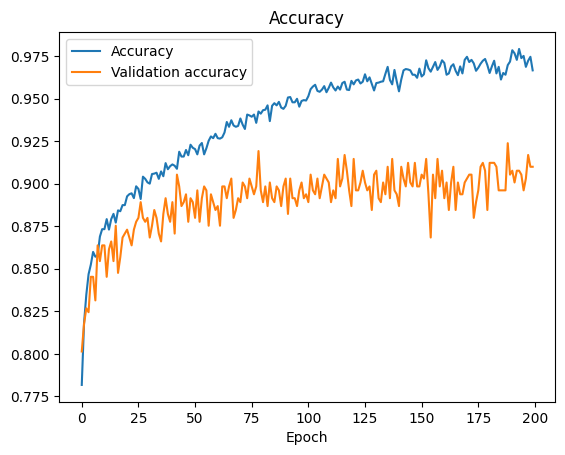

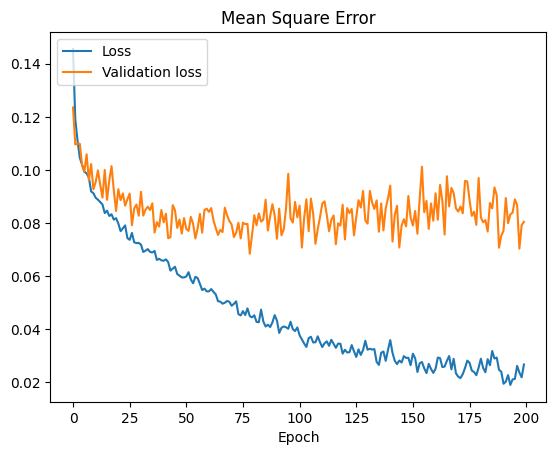

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 256)               1536      
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________



34/34 [==============================] - 0s 2ms

In [18]:
# plot history

print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

### <font color="#CA3532">Optimizations</font>

- Evaluate each of the following optimization methods using the same representation and the duration of the training in terms of epochs to reach a choice of error and also in terms of time taken.

 a) Regularization

 b) Dropout

 c) Stochastic gradient descent

 d) Momentum  (including Nesterov version)

 e) AdaGrad

 f) RMSProp

 g) Adam

 h) Optimize

In [19]:
# a) Regularization 
nn = Sequential()

act_fn = "relu"

kr=0.0001
nn.add(tf.keras.Input(shape=(input_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn,kernel_regularizer=regularizers.L1(kr)))
nn.add(tf.keras.layers.Dense(128, activation=act_fn,kernel_regularizer=regularizers.L1(kr)))
nn.add(tf.keras.layers.Dense(64, activation=act_fn,kernel_regularizer=regularizers.L1(kr)))
nn.add(tf.keras.layers.Dense(32, activation=act_fn,kernel_regularizer=regularizers.L1(kr)))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["accuracy"])

# Fit
history = nn.fit(x_train, y_train, epochs=200, validation_split=0.1)

Epoch 1/200
122/122 [==============================] - 3s 5ms/step - loss: 0.3682 - accuracy: 0.7869 - val_loss: 0.2768 - val_accuracy: 0.8129
Epoch 2/200
122/122 [==============================] - 1s 4ms/step - loss: 0.2430 - accuracy: 0.8193 - val_loss: 0.2096 - val_accuracy: 0.8199
Epoch 3/200
122/122 [==============================] - 1s 5ms/step - loss: 0.1980 - accuracy: 0.8275 - val_loss: 0.1825 - val_accuracy: 0.8268
Epoch 4/200
122/122 [==============================] - 0s 4ms/step - loss: 0.1780 - accuracy: 0.8368 - val_loss: 0.1721 - val_accuracy: 0.8199
Epoch 5/200
122/122 [==============================] - 1s 5ms/step - loss: 0.1642 - accuracy: 0.8386 - val_loss: 0.1592 - val_accuracy: 0.8291
Epoch 6/200
122/122 [==============================] - 1s 6ms/step - loss: 0.1539 - accuracy: 0.8468 - val_loss: 0.1548 - val_accuracy: 0.8245
Epoch 7/200
122/122 [==============================] - 1s 6ms/step - loss: 0.1516 - accuracy: 0.8442 - val_loss: 0.1475 - val_accuracy: 0.8337

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


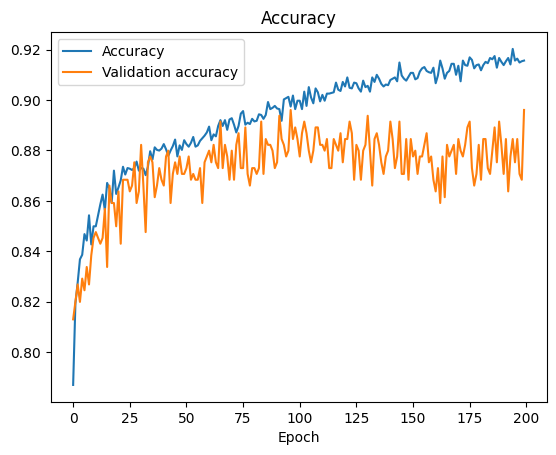

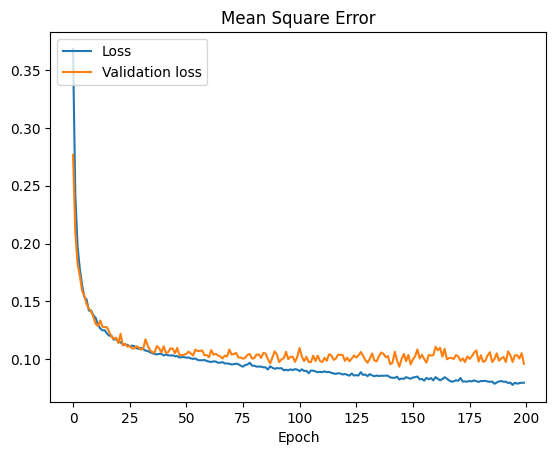

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               1536      
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________



34/34 [==============================] - 0s 2ms

In [20]:
# Plot history
print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

In [21]:
# b) Dropout

nn = Sequential()

act_fn = "relu"

nn.add(tf.keras.Input(shape=(input_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn))
nn.add(tf.keras.layers.Dropout(0.1))
nn.add(tf.keras.layers.Dense(128, activation=act_fn))
nn.add(tf.keras.layers.Dropout(0.1))
nn.add(tf.keras.layers.Dense(64, activation=act_fn))
nn.add(tf.keras.layers.Dropout(0.1))
nn.add(tf.keras.layers.Dense(32, activation=act_fn))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["accuracy"])

# Fit
history = nn.fit(x_train, y_train, epochs=200, validation_split=0.1)

Epoch 1/200
122/122 [==============================] - 2s 5ms/step - loss: 0.1512 - accuracy: 0.7769 - val_loss: 0.1286 - val_accuracy: 0.7968
Epoch 2/200
122/122 [==============================] - 0s 4ms/step - loss: 0.1240 - accuracy: 0.8144 - val_loss: 0.1254 - val_accuracy: 0.7968
Epoch 3/200
122/122 [==============================] - 1s 4ms/step - loss: 0.1157 - accuracy: 0.8324 - val_loss: 0.1086 - val_accuracy: 0.8222
Epoch 4/200
122/122 [==============================] - 1s 4ms/step - loss: 0.1095 - accuracy: 0.8406 - val_loss: 0.1138 - val_accuracy: 0.8176
Epoch 5/200
122/122 [==============================] - 1s 4ms/step - loss: 0.1074 - accuracy: 0.8473 - val_loss: 0.1037 - val_accuracy: 0.8337
Epoch 6/200
122/122 [==============================] - 0s 4ms/step - loss: 0.1037 - accuracy: 0.8486 - val_loss: 0.0984 - val_accuracy: 0.8406
Epoch 7/200
122/122 [==============================] - 0s 4ms/step - loss: 0.1023 - accuracy: 0.8517 - val_loss: 0.0981 - val_accuracy: 0.8476

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


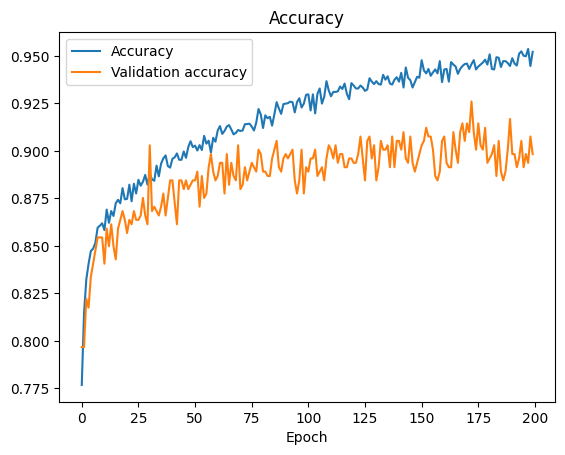

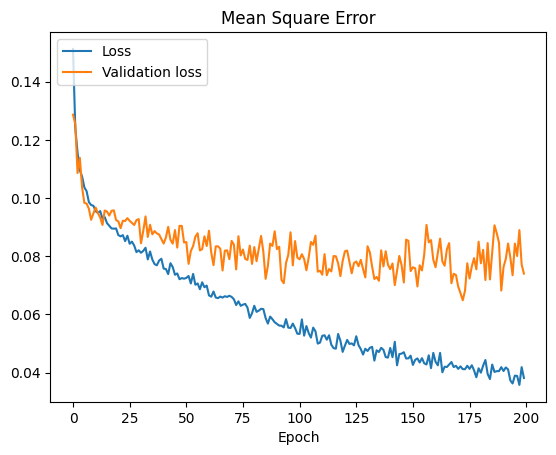

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 256)               1536      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_24 (Dense)            (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 32)               

In [22]:
# Plot history
print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

In [23]:
# c) Stochastic gradient descent

nn = Sequential()

act_fn = "relu"

nn.add(tf.keras.Input(shape=(input_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn))
nn.add(tf.keras.layers.Dense(128, activation=act_fn))
nn.add(tf.keras.layers.Dense(64, activation=act_fn))
nn.add(tf.keras.layers.Dense(32, activation=act_fn))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

nn.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, nesterov=False, name="SGD"), loss="mse", metrics=["accuracy"])

# Fit
history = nn.fit(x_train, y_train, epochs=200, validation_split=0.1)

Epoch 1/200
122/122 [==============================] - 1s 5ms/step - loss: 0.2426 - accuracy: 0.7108 - val_loss: 0.2399 - val_accuracy: 0.7367
Epoch 2/200
122/122 [==============================] - 0s 4ms/step - loss: 0.2390 - accuracy: 0.7049 - val_loss: 0.2360 - val_accuracy: 0.7321
Epoch 3/200
122/122 [==============================] - 0s 4ms/step - loss: 0.2355 - accuracy: 0.7041 - val_loss: 0.2323 - val_accuracy: 0.7275
Epoch 4/200
122/122 [==============================] - 0s 4ms/step - loss: 0.2322 - accuracy: 0.7041 - val_loss: 0.2288 - val_accuracy: 0.7275
Epoch 5/200
122/122 [==============================] - 0s 4ms/step - loss: 0.2291 - accuracy: 0.7041 - val_loss: 0.2254 - val_accuracy: 0.7275
Epoch 6/200
122/122 [==============================] - 0s 4ms/step - loss: 0.2260 - accuracy: 0.7041 - val_loss: 0.2222 - val_accuracy: 0.7275
Epoch 7/200
122/122 [==============================] - 1s 4ms/step - loss: 0.2231 - accuracy: 0.7041 - val_loss: 0.2190 - val_accuracy: 0.7275

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


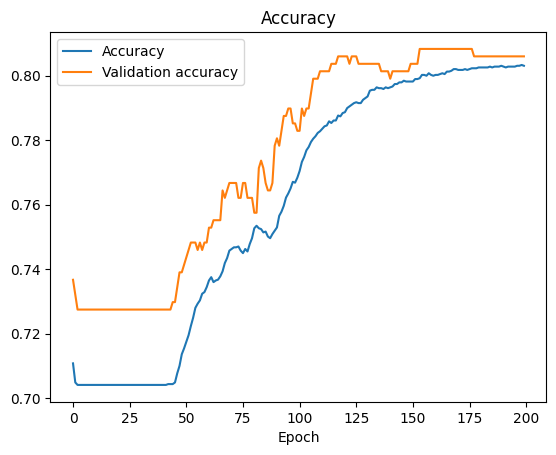

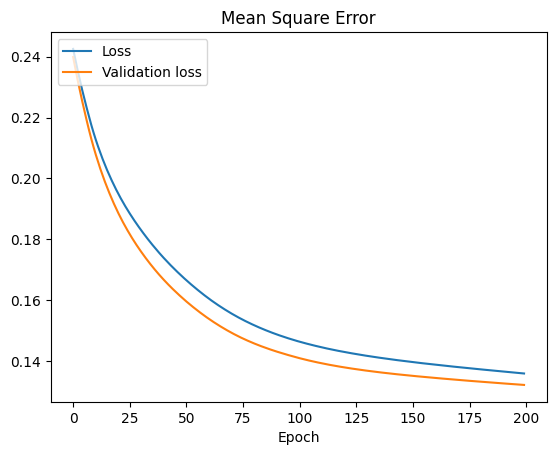

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 256)               1536      
                                                                 
 dense_29 (Dense)            (None, 128)               32896     
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________



34/34 [==============================] - 0s 2ms

In [24]:
print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

In [25]:
# d) Momentum  (including Nesterov version)
nn = Sequential()

act_fn = "relu"

nn.add(tf.keras.Input(shape=(input_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn))
nn.add(tf.keras.layers.Dense(128, activation=act_fn))
nn.add(tf.keras.layers.Dense(64, activation=act_fn))
nn.add(tf.keras.layers.Dense(32, activation=act_fn))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

nn.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, nesterov=True, name="SGD"), loss="mse", metrics=["accuracy"])

# Fit
history = nn.fit(x_train, y_train, epochs=200, validation_split=0.1)

Epoch 1/200
122/122 [==============================] - 2s 5ms/step - loss: 0.2482 - accuracy: 0.5920 - val_loss: 0.2457 - val_accuracy: 0.7067
Epoch 2/200
122/122 [==============================] - 0s 4ms/step - loss: 0.2442 - accuracy: 0.6959 - val_loss: 0.2416 - val_accuracy: 0.7275
Epoch 3/200
122/122 [==============================] - 0s 4ms/step - loss: 0.2406 - accuracy: 0.7036 - val_loss: 0.2378 - val_accuracy: 0.7275
Epoch 4/200
122/122 [==============================] - 0s 4ms/step - loss: 0.2373 - accuracy: 0.7033 - val_loss: 0.2343 - val_accuracy: 0.7275
Epoch 5/200
122/122 [==============================] - 0s 4ms/step - loss: 0.2343 - accuracy: 0.7036 - val_loss: 0.2311 - val_accuracy: 0.7275
Epoch 6/200
122/122 [==============================] - 0s 4ms/step - loss: 0.2315 - accuracy: 0.7041 - val_loss: 0.2281 - val_accuracy: 0.7275
Epoch 7/200
122/122 [==============================] - 0s 4ms/step - loss: 0.2288 - accuracy: 0.7041 - val_loss: 0.2253 - val_accuracy: 0.7275

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


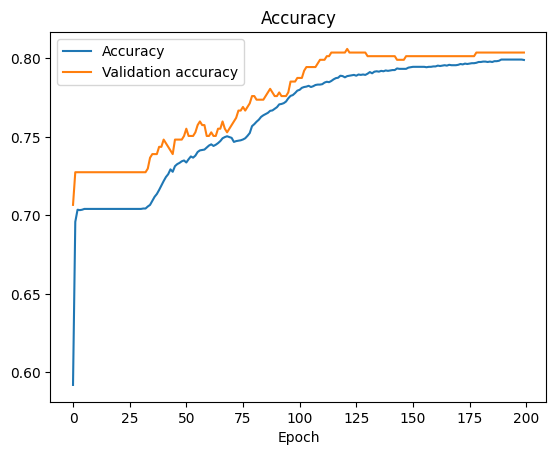

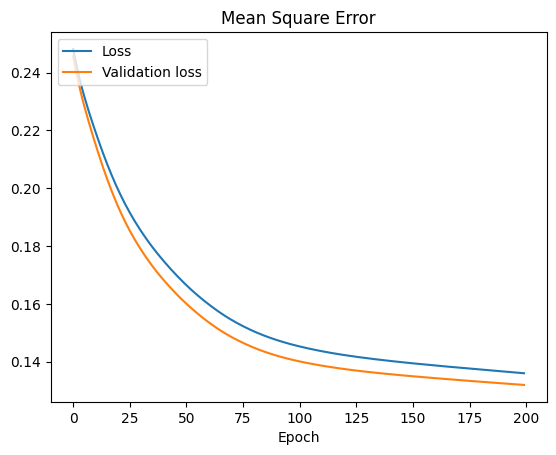

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 256)               1536      
                                                                 
 dense_34 (Dense)            (None, 128)               32896     
                                                                 
 dense_35 (Dense)            (None, 64)                8256      
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dense_37 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________



34/34 [==============================] - 0s 2ms

In [26]:
print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

In [27]:
# e) AdaGrad

nn = Sequential()

act_fn = "relu"

nn.add(tf.keras.Input(shape=(input_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn))
nn.add(tf.keras.layers.Dense(128, activation=act_fn))
nn.add(tf.keras.layers.Dense(64, activation=act_fn))
nn.add(tf.keras.layers.Dense(32, activation=act_fn))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

nn.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001, initial_accumulator_value=0, epsilon=1e-7, name="Adagrad"), 
           loss="mse", metrics=["accuracy"])

# Fit
history = nn.fit(x_train, y_train, epochs=200, validation_split=0.1)

Epoch 1/200
122/122 [==============================] - 3s 7ms/step - loss: 0.1674 - accuracy: 0.7594 - val_loss: 0.1411 - val_accuracy: 0.7968
Epoch 2/200
122/122 [==============================] - 1s 4ms/step - loss: 0.1410 - accuracy: 0.7933 - val_loss: 0.1340 - val_accuracy: 0.8037
Epoch 3/200
122/122 [==============================] - 0s 4ms/step - loss: 0.1360 - accuracy: 0.8036 - val_loss: 0.1308 - val_accuracy: 0.8014
Epoch 4/200
122/122 [==============================] - 0s 4ms/step - loss: 0.1327 - accuracy: 0.8093 - val_loss: 0.1281 - val_accuracy: 0.8083
Epoch 5/200
122/122 [==============================] - 0s 4ms/step - loss: 0.1299 - accuracy: 0.8105 - val_loss: 0.1268 - val_accuracy: 0.8106
Epoch 6/200
122/122 [==============================] - 1s 4ms/step - loss: 0.1276 - accuracy: 0.8188 - val_loss: 0.1246 - val_accuracy: 0.8060
Epoch 7/200
122/122 [==============================] - 0s 4ms/step - loss: 0.1255 - accuracy: 0.8185 - val_loss: 0.1231 - val_accuracy: 0.8060

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


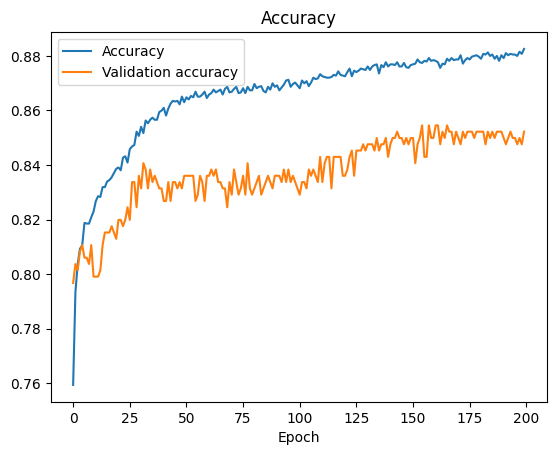

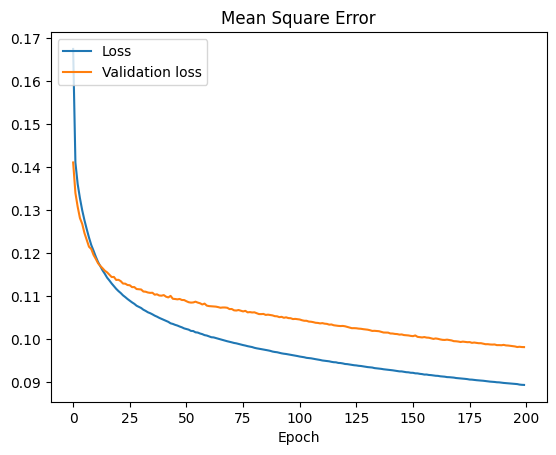

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 256)               1536      
                                                                 
 dense_39 (Dense)            (None, 128)               32896     
                                                                 
 dense_40 (Dense)            (None, 64)                8256      
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________



34/34 [==============================] - 0s 2ms

In [28]:
print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

In [29]:
# f) RMSProp

nn = Sequential()

act_fn = "relu"

nn.add(tf.keras.Input(shape=(input_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn))
nn.add(tf.keras.layers.Dense(128, activation=act_fn))
nn.add(tf.keras.layers.Dense(64, activation=act_fn))
nn.add(tf.keras.layers.Dense(32, activation=act_fn))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

nn.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=0, rho=0.9, epsilon=1e-7, centered=False, name="RMSProp"),
           loss="mse", metrics=["accuracy"])

# Fit
history = nn.fit(x_train, y_train, epochs=200, validation_split=0.1)

Epoch 1/200
122/122 [==============================] - 2s 5ms/step - loss: 0.1404 - accuracy: 0.7959 - val_loss: 0.1213 - val_accuracy: 0.8199
Epoch 2/200
122/122 [==============================] - 0s 4ms/step - loss: 0.1179 - accuracy: 0.8285 - val_loss: 0.1145 - val_accuracy: 0.8060
Epoch 3/200
122/122 [==============================] - 1s 6ms/step - loss: 0.1123 - accuracy: 0.8326 - val_loss: 0.1051 - val_accuracy: 0.8337
Epoch 4/200
122/122 [==============================] - 1s 6ms/step - loss: 0.1071 - accuracy: 0.8473 - val_loss: 0.1027 - val_accuracy: 0.8406
Epoch 5/200
122/122 [==============================] - 1s 6ms/step - loss: 0.1044 - accuracy: 0.8509 - val_loss: 0.1016 - val_accuracy: 0.8453
Epoch 6/200
122/122 [==============================] - 1s 4ms/step - loss: 0.1023 - accuracy: 0.8509 - val_loss: 0.1022 - val_accuracy: 0.8430
Epoch 7/200
122/122 [==============================] - 0s 4ms/step - loss: 0.0987 - accuracy: 0.8596 - val_loss: 0.1057 - val_accuracy: 0.8476

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


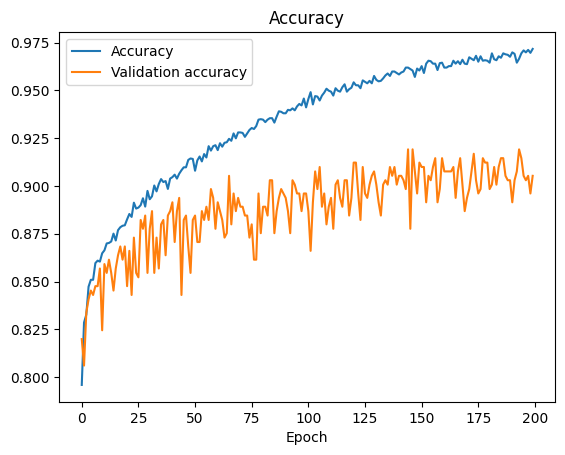

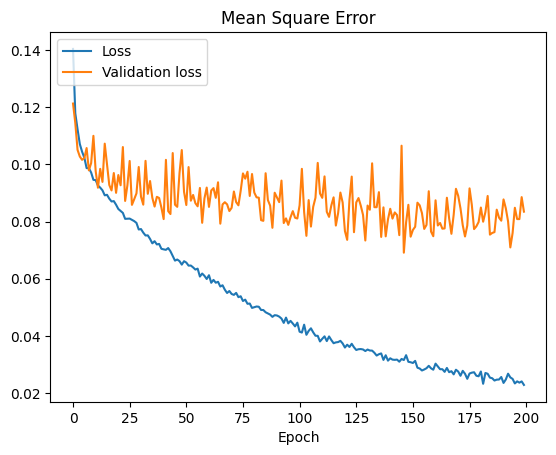

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 256)               1536      
                                                                 
 dense_44 (Dense)            (None, 128)               32896     
                                                                 
 dense_45 (Dense)            (None, 64)                8256      
                                                                 
 dense_46 (Dense)            (None, 32)                2080      
                                                                 
 dense_47 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________



34/34 [==============================] - 0s 2m

In [30]:
print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

In [31]:
# g) Adam

nn = Sequential()

act_fn = "relu"

nn.add(tf.keras.Input(shape=(input_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn))
nn.add(tf.keras.layers.Dense(128, activation=act_fn))
nn.add(tf.keras.layers.Dense(64, activation=act_fn))
nn.add(tf.keras.layers.Dense(32, activation=act_fn))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99, epsilon=1e-7, amsgrad=False, name="Adam"),
           loss="mse", metrics=["accuracy"])

# Fit
history = nn.fit(x_train, y_train, epochs=200, validation_split=0.1)

Epoch 1/200
122/122 [==============================] - 3s 5ms/step - loss: 0.1469 - accuracy: 0.7833 - val_loss: 0.1241 - val_accuracy: 0.8129
Epoch 2/200
122/122 [==============================] - 0s 4ms/step - loss: 0.1183 - accuracy: 0.8262 - val_loss: 0.1102 - val_accuracy: 0.8199
Epoch 3/200
122/122 [==============================] - 0s 4ms/step - loss: 0.1116 - accuracy: 0.8404 - val_loss: 0.1080 - val_accuracy: 0.8314
Epoch 4/200
122/122 [==============================] - 1s 4ms/step - loss: 0.1049 - accuracy: 0.8481 - val_loss: 0.1136 - val_accuracy: 0.8129
Epoch 5/200
122/122 [==============================] - 0s 4ms/step - loss: 0.1036 - accuracy: 0.8486 - val_loss: 0.1013 - val_accuracy: 0.8453
Epoch 6/200
122/122 [==============================] - 1s 5ms/step - loss: 0.1002 - accuracy: 0.8522 - val_loss: 0.0995 - val_accuracy: 0.8545
Epoch 7/200
122/122 [==============================] - 1s 5ms/step - loss: 0.0967 - accuracy: 0.8609 - val_loss: 0.0974 - val_accuracy: 0.8499

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


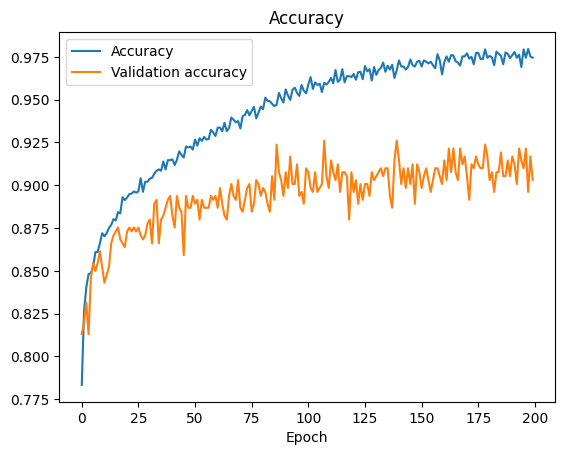

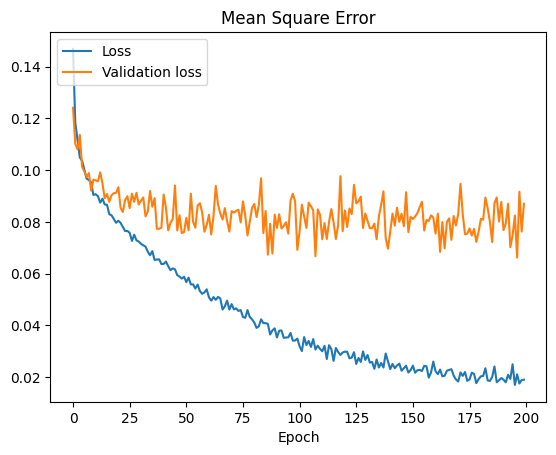

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 256)               1536      
                                                                 
 dense_49 (Dense)            (None, 128)               32896     
                                                                 
 dense_50 (Dense)            (None, 64)                8256      
                                                                 
 dense_51 (Dense)            (None, 32)                2080      
                                                                 
 dense_52 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________



34/34 [==============================] - 0s 3m

In [32]:
# Plot history
print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

In [33]:
#  h) Optimize
nn = Sequential()

act_fn = "relu"

nn.add(tf.keras.Input(shape=(input_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn))
nn.add(tf.keras.layers.Dense(128, activation=act_fn))
nn.add(tf.keras.layers.Dense(64, activation=act_fn))
nn.add(tf.keras.layers.Dense(32, activation=act_fn))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99, epsilon=1e-7, amsgrad=False, name="Adam"),
           loss="mse", metrics=["accuracy"])

class_weight = {
    0: np.mean(y),
    1: 1 - np.mean(y)
}

# Fit
history = nn.fit(x_train, y_train, epochs=200, validation_split=0.1, class_weight=class_weight)

Epoch 1/200
122/122 [==============================] - 2s 5ms/step - loss: 0.0635 - accuracy: 0.7807 - val_loss: 0.1299 - val_accuracy: 0.8176
Epoch 2/200
122/122 [==============================] - 0s 4ms/step - loss: 0.0524 - accuracy: 0.8075 - val_loss: 0.1239 - val_accuracy: 0.8037
Epoch 3/200
122/122 [==============================] - 1s 5ms/step - loss: 0.0506 - accuracy: 0.8098 - val_loss: 0.1514 - val_accuracy: 0.7945
Epoch 4/200
122/122 [==============================] - 1s 4ms/step - loss: 0.0488 - accuracy: 0.8139 - val_loss: 0.1449 - val_accuracy: 0.7921
Epoch 5/200
122/122 [==============================] - 1s 4ms/step - loss: 0.0470 - accuracy: 0.8157 - val_loss: 0.1393 - val_accuracy: 0.7875
Epoch 6/200
122/122 [==============================] - 1s 4ms/step - loss: 0.0460 - accuracy: 0.8229 - val_loss: 0.1213 - val_accuracy: 0.8152
Epoch 7/200
122/122 [==============================] - 1s 4ms/step - loss: 0.0451 - accuracy: 0.8254 - val_loss: 0.1248 - val_accuracy: 0.8106

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


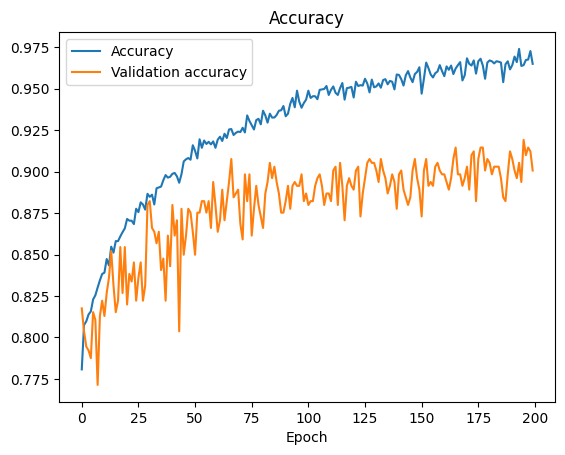

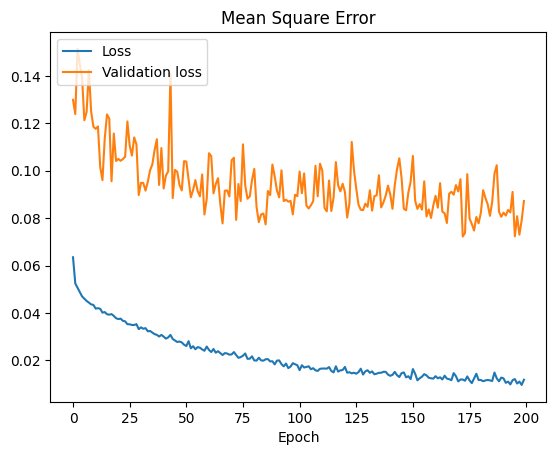

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 256)               1536      
                                                                 
 dense_54 (Dense)            (None, 128)               32896     
                                                                 
 dense_55 (Dense)            (None, 64)                8256      
                                                                 
 dense_56 (Dense)            (None, 32)                2080      
                                                                 
 dense_57 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________



34/34 [==============================] - 0s 2m

In [34]:
# Plot history
print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

### <font color="#CA3532">Implement parallelization in Keras with the best optimization</font>






*   Run tests for GPU presence

*   Use your best implementation from the previous exercise here and compare the training time both with GPUs and without GPUs.

Comment all your results.





In [35]:
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True


In [36]:
nn = Sequential()

act_fn = "relu"

nn.add(tf.keras.Input(shape=(input_size,)))
nn.add(tf.keras.layers.Dense(256, activation=act_fn))
nn.add(tf.keras.layers.Dense(128, activation=act_fn))
nn.add(tf.keras.layers.Dense(64, activation=act_fn))
nn.add(tf.keras.layers.Dense(32, activation=act_fn))
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=100,
    restore_best_weights=True
)

nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
           loss="mse", metrics=["accuracy"])

t = time()
# Fit
history = nn.fit(x_train, y_train, epochs=200, validation_split=0.2)
print(time() - t)

Epoch 1/200
109/109 [==============================] - 2s 6ms/step - loss: 0.1557 - accuracy: 0.7794 - val_loss: 0.1236 - val_accuracy: 0.8116
Epoch 2/200
109/109 [==============================] - 0s 4ms/step - loss: 0.1201 - accuracy: 0.8210 - val_loss: 0.1141 - val_accuracy: 0.8185
Epoch 3/200
109/109 [==============================] - 1s 7ms/step - loss: 0.1152 - accuracy: 0.8320 - val_loss: 0.1150 - val_accuracy: 0.8231
Epoch 4/200
109/109 [==============================] - 1s 6ms/step - loss: 0.1070 - accuracy: 0.8459 - val_loss: 0.1050 - val_accuracy: 0.8520
Epoch 5/200
109/109 [==============================] - 1s 7ms/step - loss: 0.1026 - accuracy: 0.8525 - val_loss: 0.1015 - val_accuracy: 0.8486
Epoch 6/200
109/109 [==============================] - 1s 5ms/step - loss: 0.1026 - accuracy: 0.8534 - val_loss: 0.1080 - val_accuracy: 0.8416
Epoch 7/200
109/109 [==============================] - 0s 4ms/step - loss: 0.1006 - accuracy: 0.8557 - val_loss: 0.1017 - val_accuracy: 0.8486

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


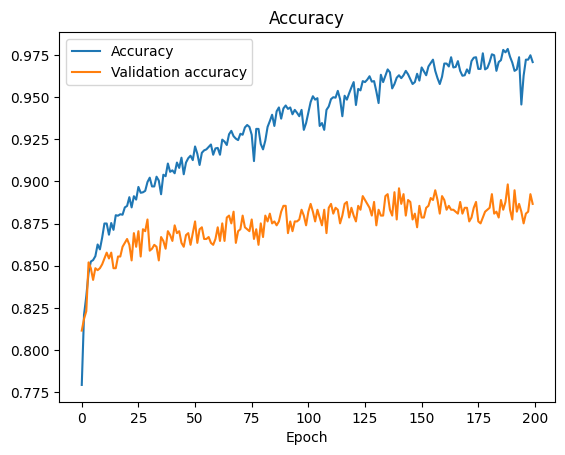

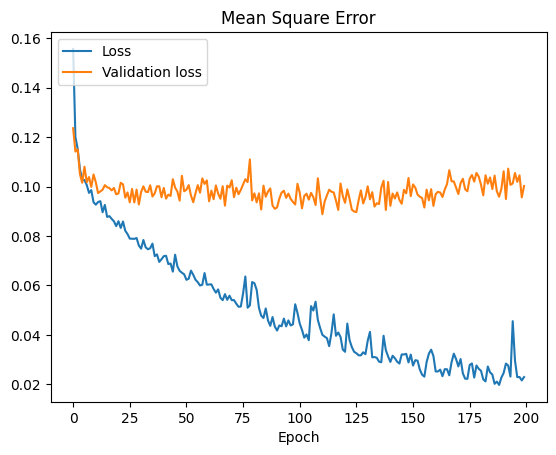

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 256)               1536      
                                                                 
 dense_59 (Dense)            (None, 128)               32896     
                                                                 
 dense_60 (Dense)            (None, 64)                8256      
                                                                 
 dense_61 (Dense)            (None, 32)                2080      
                                                                 
 dense_62 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________



34/34 [==============================] - 0s 2m

In [37]:
# Plot history
print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))
     

### <font color="#CA3532">Convolutional Neural Networks</font>




Implement a convolutional neural network and apply it to classify the images of the CIFAR-10 dataset. The network should have at least the following characteristics:

    Convolutional layers.
    Pooling layers.
    Some regularization mechanism, such as dropout or L2 regularization.
    Batch normalization layers.

The network should obtain at least 75% accuracy on the test set.


In [38]:
# from tensorflow.keras.datasets import cifar10
# import tensorflow as tf

# from tensorflow.keras import datasets, layers, models
# import matplotlib.pyplot as plt
# from tensorflow.keras.optimizers import Adam

In [39]:
from tensorflow.keras.datasets import cifar10

import numpy as np
import pandas as pd

import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
from PIL import Image

In [40]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

170498071/170498071 [==============================] - 5s 0us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


In [41]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [42]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [43]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [44]:
def cnn_model():
    
    model = Sequential()
    
    # First Conv layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    # Second Conv layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    # Third, fourth, fifth convolution layer
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Fully Connected layers
    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))
    
    model.summary()
    
    return model

In [45]:
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=False)

datagen.fit(X_train)

In [46]:
model = cnn_model()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 256)       

In [47]:
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(learning_rate=0.0003),
             metrics=['accuracy'])

In [48]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 64),
                    steps_per_epoch = len(X_train) // 64, 
                    epochs = 50, 
                    validation_data= (X_valid, y_valid),
                    verbose=1)

Epoch 1/50


<ipython-input-48-6106e1db94bc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 64),


625/625 [==============================] - 41s 50ms/step - loss: 2.1637 - accuracy: 0.1897 - val_loss: 1.7435 - val_accuracy: 0.3407
Epoch 2/50
625/625 [==============================] - 29s 46ms/step - loss: 1.7447 - accuracy: 0.3473 - val_loss: 1.5215 - val_accuracy: 0.4442
Epoch 3/50
625/625 [==============================] - 30s 47ms/step - loss: 1.5320 - accuracy: 0.4503 - val_loss: 1.3068 - val_accuracy: 0.5242
Epoch 4/50
625/625 [==============================] - 31s 49ms/step - loss: 1.4061 - accuracy: 0.5103 - val_loss: 1.2202 - val_accuracy: 0.5792
Epoch 5/50
625/625 [==============================] - 29s 46ms/step - loss: 1.3114 - accuracy: 0.5515 - val_loss: 1.1768 - val_accuracy: 0.5856
Epoch 6/50
625/625 [==============================] - 31s 49ms/step - loss: 1.2275 - accuracy: 0.5853 - val_loss: 0.9927 - val_accuracy: 0.6633
Epoch 7/50
625/625 [==============================] - 30s 48ms/step - loss: 1.1740 - accuracy: 0.6093 - val_loss: 1.0156 - val_accuracy: 0.6590
Epo

<Axes: >

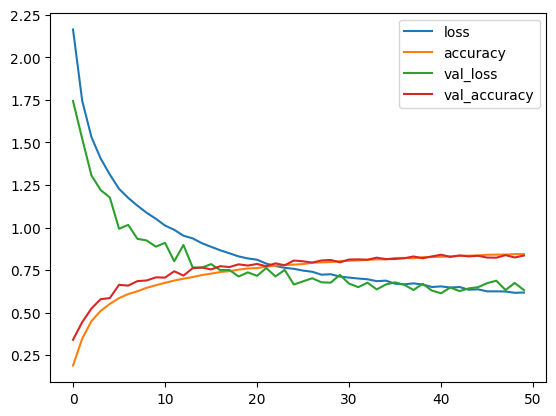

In [49]:
pd.DataFrame(history.history).plot()

In [50]:
scores, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 2s 6ms/step - loss: 0.6423 - accuracy: 0.8411
Accuracy: 84.11


In [51]:
pred = model.predict(X_test)

labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
errors = y_pred - y_true != 0

313/313 [==============================] - 2s 5ms/step


In [52]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1000
           1       0.95      0.91      0.93      1000
           2       0.86      0.73      0.79      1000
           3       0.78      0.58      0.67      1000
           4       0.81      0.82      0.82      1000
           5       0.73      0.80      0.76      1000
           6       0.74      0.96      0.83      1000
           7       0.90      0.89      0.90      1000
           8       0.95      0.90      0.92      1000
           9       0.88      0.92      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



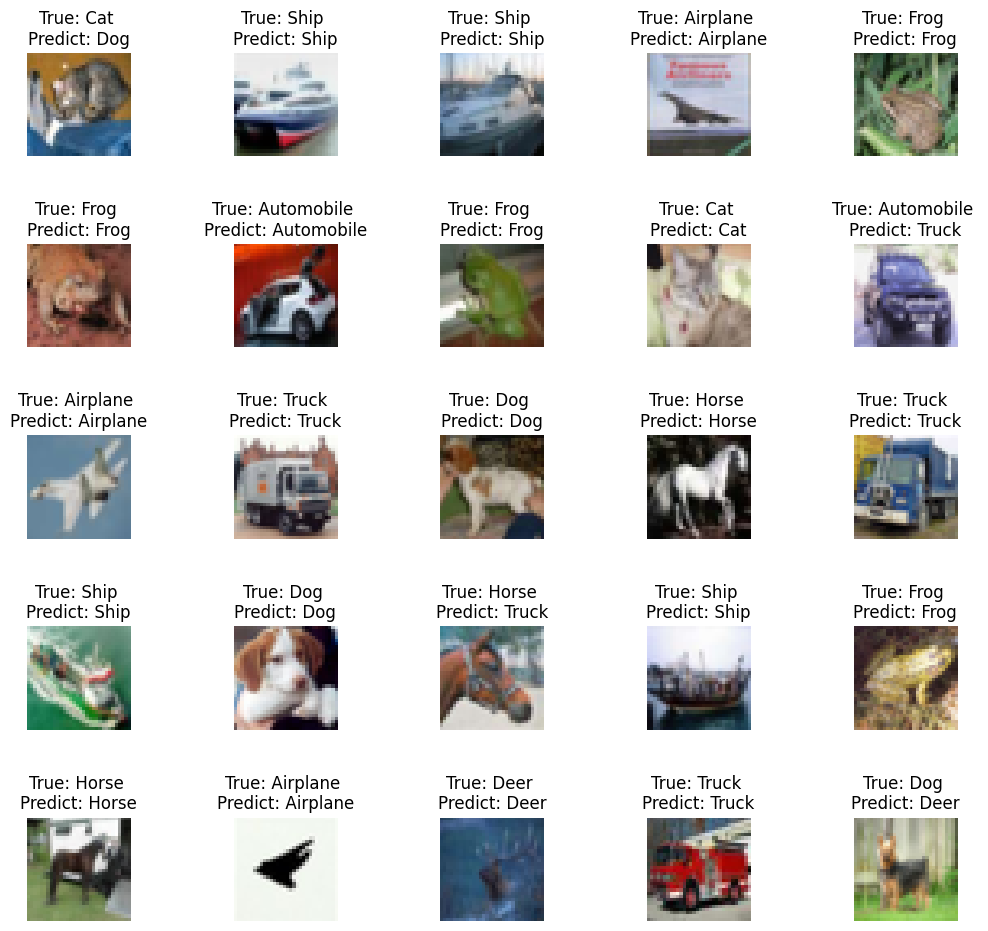

In [53]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(25):
    axes[i].imshow(X_test[i])
    axes[i].set_title('True: %s \nPredict: %s' % (labels[y_true[i]], labels[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

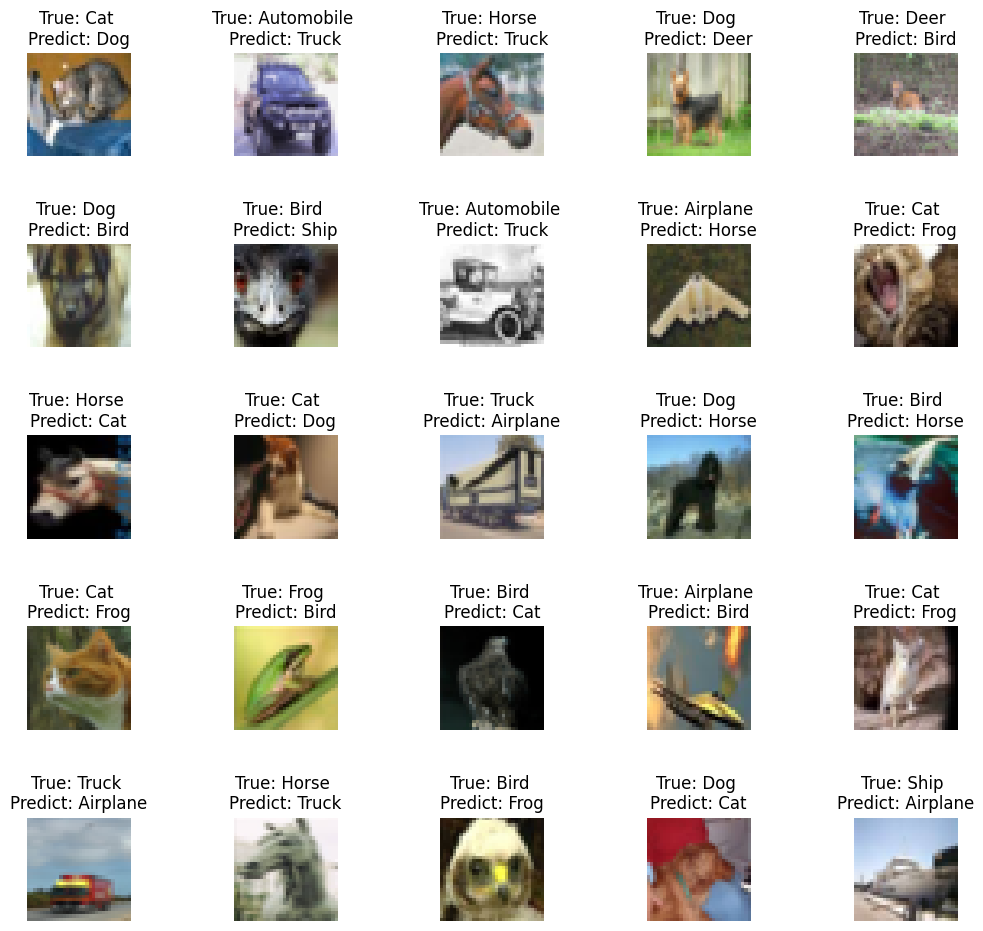

In [54]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()

miss_pred = np.where(y_pred != y_true)[0]
for i in np.arange(25):
    axes[i].imshow(X_test[miss_pred[i]])
    axes[i].set_title('True: %s \nPredict: %s' % (labels[y_true[miss_pred[i]]], labels[y_pred[miss_pred[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [55]:
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.11
